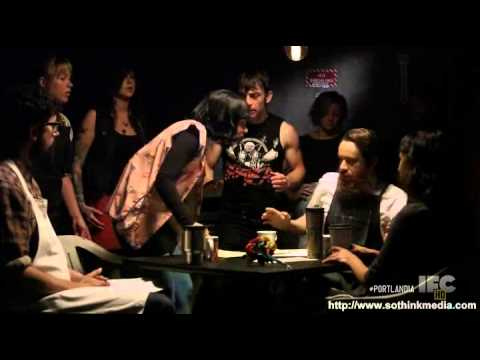

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')


In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

"""
Import Statements
"""

# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

In [5]:
import pandas as pd
df_shop = pd.read_csv('./data/yelp_coffeeshop_review_data.csv')

In [6]:
df_shop.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [7]:
df_shop.shape

(7616, 3)

In [8]:
df_shop['star_rating'].value_counts()



 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

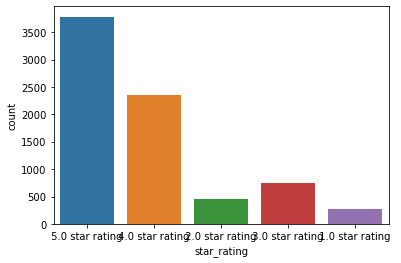

In [9]:
import seaborn as sns

stars = df_shop['star_rating']

sns.countplot(stars);

In [10]:
df_shop['coffee_shop_name'].value_counts(normalize=True)


Epoch Coffee                            0.052521
Halcyon                                 0.039391
The Factory - Cafe With a Soul          0.032038
Houndstooth Coffee                      0.026261
Venezia Italian Gelato                  0.026261
Caffé Medici                            0.018776
Apanas Coffee & Beer                    0.017857
Hot Mama’s Cafe                         0.013130
Live Oak Market                         0.013130
Patika                                  0.013130
Café Java                               0.013130
Picnik Austin                           0.013130
Dominican Joe                           0.013130
Mary’s Cafe                             0.013130
Anderson’s Coffee Company               0.013130
Bennu Coffee                            0.013130
Stinson’s                               0.013130
Vintage Heart Coffee                    0.013130
Kick Butt Coffee Music & Booze          0.013130
TOMS                                    0.013130
Quack’s 43rd Street 

In [11]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
counts_words = Counter()

# Update it based on a split of each of our documents
df_shop['full_review_text'].apply(lambda x: counts_words.update(x))

# Print out the 10 most common words
counts_words.most_common(10)

[(' ', 811098),
 ('e', 412304),
 ('t', 288595),
 ('a', 267274),
 ('o', 258721),
 ('i', 208132),
 ('s', 198605),
 ('n', 197906),
 ('r', 177641),
 ('h', 155661)]

In [12]:
def counting(cols):

        counts_words = Counter()
        appears_in = Counter()
        
        total_docs = len(cols)

        for col in cols:
            counts_words.update(col)
            appears_in.update(set(col))

        temps = zip(counts_words.keys(), counts_words.values())
        
        wor_cou = pd.DataFrame(temps, columns = ['word', 'count'])

        wor_cou['rank'] = wor_cou['count'].rank(method='first', ascending=False)
        total = wor_cou['count'].sum()

        wor_cou['pct_total'] = wor_cou['count'].apply(lambda x: x / total)
        
        wor_cou = wor_cou.sort_values(by='rank')
        wor_cou['cul_pct_total'] = wor_cou['pct_total'].cumsum()

        tor2 = zip(appears_in.keys(), appears_in.values())
        ac_say = pd.DataFrame(tor2, columns=['word', 'appears_in'])
        wor_cou = ac_say.merge(wor_cou, on='word')

        wor_cou['appears_in_pct'] = wor_cou['appears_in'].apply(lambda x: x / total_docs)
        
        return wor_cou.sort_values(by='rank')

In [14]:
# Use the Function
wor_cou = counting(df_shop['full_review_text'])

In [15]:
wor_cou.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,,7616,811098,1.0,0.186827,0.186827,1.000000
38,e,7616,412304,2.0,0.094969,0.281796,1.000000
1,t,7612,288595,3.0,0.066474,0.348270,0.999475
19,a,7613,267274,4.0,0.061563,0.409834,0.999606
13,o,7615,258721,5.0,0.059593,0.469427,0.999869


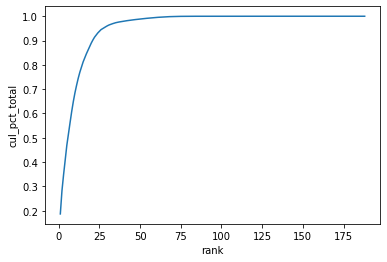

In [16]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wor_cou);

In [17]:
wor_cou[wor_cou['rank'] <= 20]['cul_pct_total'].max()

0.8895368040970681

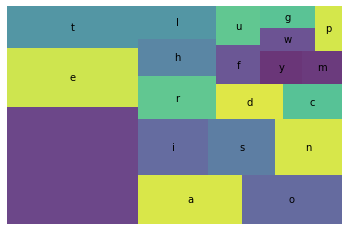

In [19]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wor_cou[wor_cou['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [1]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)


In [21]:
# Spacy's Default Stop Words
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [23]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df_shop['tokens'] = tokens

In [25]:
df_shop.tokens.head()

0    [ , 11/25/2016, 1, check-in, love, love, loved...
1    [ , 12/2/2016, listed, date, night:, austin,, ...
2    [ , 11/30/2016, 1, check-in, listed, brunch, s...
3    [ , 11/25/2016, cool, decor!, good, drinks, ni...
4    [ , 12/3/2016, 1, check-in, located, northcros...
Name: tokens, dtype: object

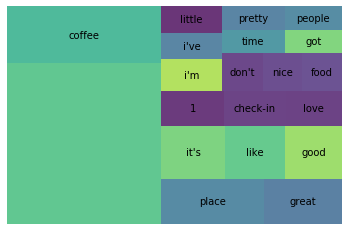

In [27]:
wor_cou = counting(df_shop['tokens'])

wc_top20 = wor_cou[wor_cou['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [29]:
#print(type(nlp.Defaults.stop_words))v
STOP_WORDS = nlp.Defaults.stop_words.union(["i'm",'', "i've", "it's"])

In [32]:
tokens = []

for col in tokenizer.pipe(df_shop['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in col: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df_shop['tokens'] = tokens

In [33]:
wor_cuo = counting(df_shop['tokens'])
wor_cuo.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,,7616,22606,1.0,0.053936,0.053936,1.000000
41,coffee,4210,8058,2.0,0.019226,0.073161,0.552784
161,place,3029,4264,3.0,0.010174,0.083335,0.397715
149,great,2438,3250,4.0,0.007754,0.091089,0.320116
168,like,2034,2902,5.0,0.006924,0.098013,0.267069


In [34]:
wc_top20 = wor_cuo[wor_cou['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

C:\Users\zebfr\Anaconda3\envs\U4-S1-NLP\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match